In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/traducido_dataset_unificado_v_30jun.csv')

/tmp/ipython-input-4-1065101852.py:1: DtypeWarning: Columns (9,10,11,12,13,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/drive/MyDrive/traducido_dataset_unificado_v_30jun.csv')


In [5]:
train_df.head(20)

source_dataset  target_column  \
0   edos_labelled_aggregated              0   
1   edos_labelled_aggregated              0   
2   edos_labelled_aggregated              0   
3   edos_labelled_aggregated              0   
4   edos_labelled_aggregated              0   
5   edos_labelled_aggregated              0   
6   edos_labelled_aggregated              1   
7   edos_labelled_aggregated              0   
8   edos_labelled_aggregated              1   
9   edos_labelled_aggregated              1   
10  edos_labelled_aggregated              0   
11  edos_labelled_aggregated              0   
12  edos_labelled_aggregated              0   
13  edos_labelled_aggregated              0   
14  edos_labelled_aggregated              1   
15  edos_labelled_aggregated              1   
16  edos_labelled_aggregated              0   
17  edos_labelled_aggregated              0   
18  edos_labelled_aggregated              0   
19  edos_labelled_aggregated              0   

                                 subcategory_combined  \
0                                                 NaN   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6   1 | 3. animosity | 3.3 backhanded gendered com...   
7                                                 NaN   
8   1 | 2. derogation | 2.3 dehumanising attacks &...   
9         1 | 2. derogation | 2.1 descriptive attacks   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14  1 | 2. derogation | 2.3 dehumanising attacks &...   
15  1 | 2. derogation | 2.2 aggressive and emotive...   
16                                                NaN   
17                                                NaN   
18                                                NaN   
19                                                NaN   

                                                 text  \
0   In Nigeria, if you rape a woman, the men rape ...   
1                             Then, she's a keeper. 😉   
2   This is like the Metallica video where the poo...   
3                                              woman?   
4                      I bet she wished she had a gun   
5   Unlicensed day care worker reportedly tells co...   
6   [USER] Leg day is easy. Hot girls who wear min...   
7   I don't know if you should avoid this one or e...   
8   I get a new pussy every other week or whenever...   
9   I agree with that but at the same time I know ...   
10                                  Release that shit   
11  Making games is a better cope. If you like gam...   
12  Guaranteed she chimped after being denied use ...   
13              Black ops 1's first dlc was ascension   
14  O come on there's no way any men are attracted...   
15  democrats from Minnesota (leftist muzzie shith...   
16  I don't really need to. It will be scrubbed fr...   
17  We need to stop referring to all men as kings ...   
18  yes maam , I will just sit here in the corner ...   
19  I literally HATE the Republicans. I am one but...   

                                         text_english  \
0   In Nigeria, if you rape a woman, the men rape ...   
1                             Then, she's a keeper. 😉   
2   This is like the Metallica video where the poo...   
3                                              woman?   
4                      I bet she wished she had a gun   
5   Unlicensed day care worker reportedly tells co...   
6   [USER] Leg day is easy. Hot girls who wear min...   
7   I don't know if you should avoid this one or e...   
8   I get a new pussy every other week or whenever...   
9   I agree with that but at the same time I know ...   
10 

In [6]:
print("Training set shape:", train_df.shape)

Training set shape: (44352, 27)


In [7]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44352 entries, 0 to 44351
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   source_dataset        44352 non-null  object 
 1   target_column         44352 non-null  int64  
 2   subcategory_combined  8612 non-null   object 
 3   text                  44352 non-null  object 
 4   text_english          44352 non-null  object 
 5   text_spanish          44352 non-null  object 
 6   id                    24336 non-null  float64
 7   subcategory_general   8612 non-null   object 
 8   subcategory_specific  8612 non-null   object 
 9   rewire_id             20016 non-null  object 
 10  label_sexist          20016 non-null  object 
 11  label_category        20016 non-null  object 
 12  label_vector          20016 non-null  object 
 13  split                 20016 non-null  object 
 14  split_type            44352 non-null  object 
 15  annotator          

In [8]:
# Count of each label
label_counts = train_df['label_sexist'].value_counts()
total = label_counts.sum()

# Absolute numbers
non_sexist_count = label_counts[0]
sexist_count = label_counts[1]

# Percentages
non_sexist_pct = (non_sexist_count / total) * 100
sexist_pct = (sexist_count / total) * 100

# Print results
print(f"Non-sexist tweets: {non_sexist_count} ({non_sexist_pct:.2f}%)")
print(f"Sexist tweets: {sexist_count} ({sexist_pct:.2f}%)")

Non-sexist tweets: 15159 (75.73%)
Sexist tweets: 4857 (24.27%)


/tmp/ipython-input-8-1344651211.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  non_sexist_count = label_counts[0]
/tmp/ipython-input-8-1344651211.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sexist_count = label_counts[1]


In [ ]:
print(train_df.isnull().sum())

source_dataset              0
target_column               0
subcategory_combined    35740
text                        0
text_english                0
text_spanish                0
id                      20016
subcategory_general     35740
subcategory_specific    35740
rewire_id               24336
label_sexist            24336
label_category          24336
label_vector            24336
split                   24336
split_type                  0
annotator               44336
HS                      29226
TR                      29226
AG                      29226
label                   42071
test_case               37423
source                  37423
language                37423
task1                   37423
task2                   37423
detected_language          10
multiclass_final        35740
dtype: int64


DATA EXPLORATION

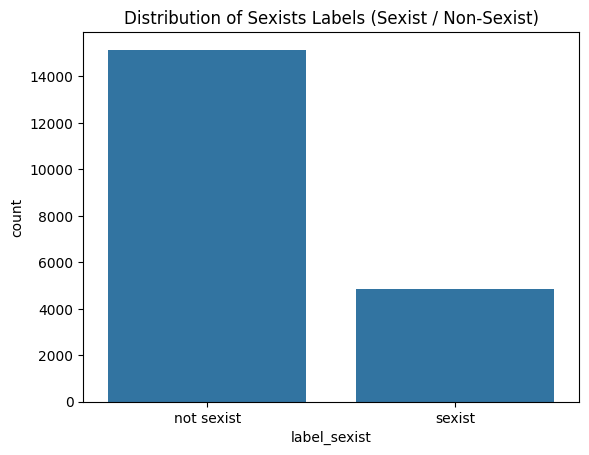

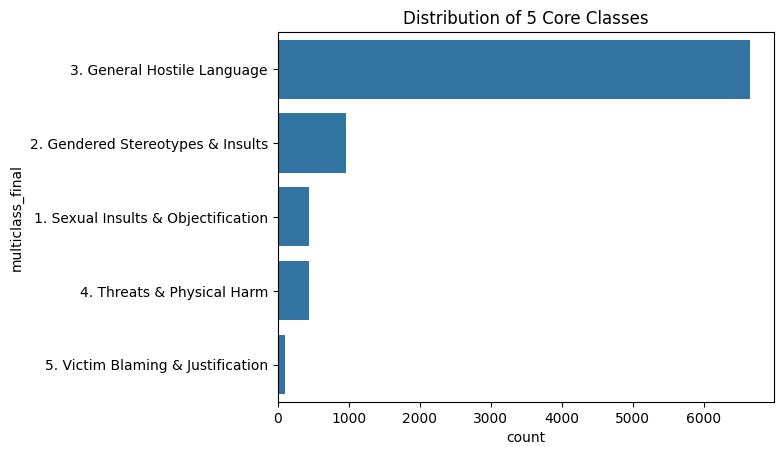

In [16]:
# Count of 'sexist' vs 'non-sexist'
sns.countplot(x='label_sexist', data=train_df)
plt.title('Distribution of Sexists Labels (Sexist / Non-Sexist)')
plt.show()

# Distribution of fine-grained categories (task2)
sns.countplot(y='multiclass_final', data=train_df, order=train_df['multiclass_final'].value_counts().index)
plt.title('Distribution of 5 Core Classes')
plt.show()


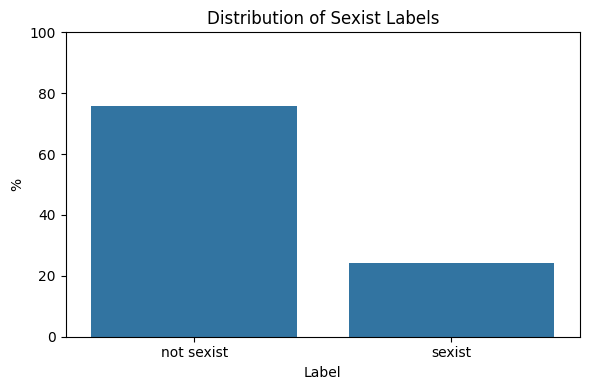

In [16]:
# Calculate percentage for binary label
label_sexist_pct = train_df['label_sexist'].value_counts(normalize=True).rename({0: 'not sexist', 1: 'sexist'}) * 100

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=label_sexist_pct.index, y=label_sexist_pct.values)
plt.title('Distribution of Sexist Labels')
plt.ylabel('%')
plt.xlabel('Label')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

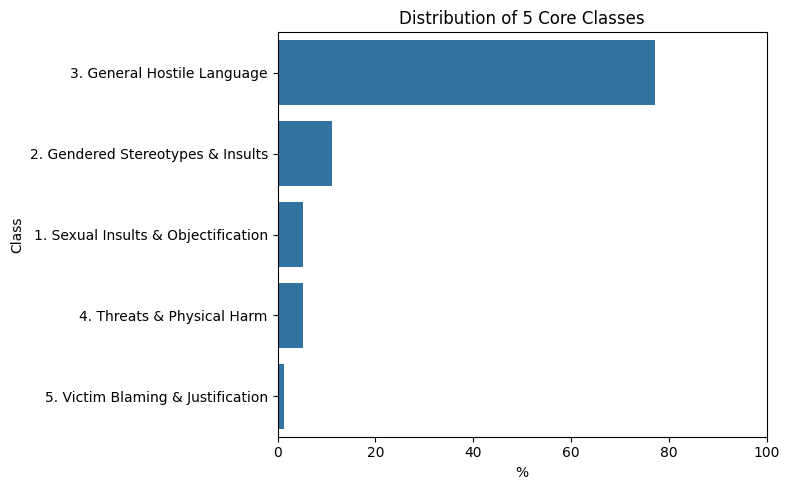

In [12]:
multiclass_pct = train_df['multiclass_final'].value_counts(normalize=True) * 100

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(y=multiclass_pct.index, x=multiclass_pct.values)
plt.title('Distribution of 5 Core Classes')
plt.xlabel('%')
plt.ylabel('Class')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

In [5]:
non_sexist_df = train_df[train_df['label_sexist'] == 0]

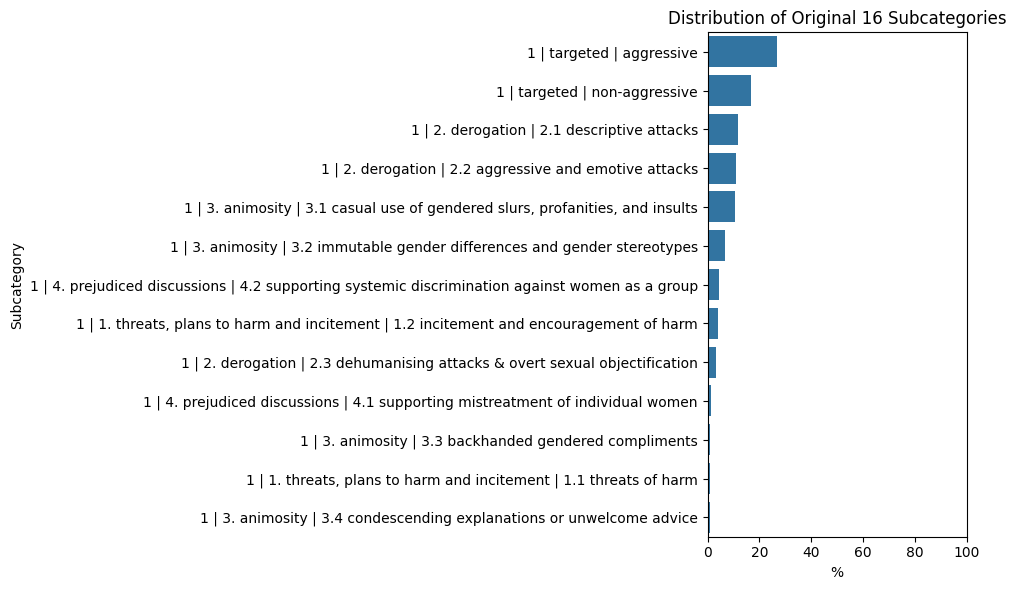

In [15]:
# Calculate percentage for subcategory distribution
subcategory_pct = train_df['subcategory_combined'].value_counts(normalize=True) * 100

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=subcategory_pct.index, x=subcategory_pct.values)
plt.title('Distribution of Original 16 Subcategories')
plt.xlabel('%')
plt.ylabel('Subcategory')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

In [4]:
# Count of original 16 subcategories
before_mapping = train_df['subcategory_combined'].value_counts().sort_values(ascending=False)

# Optional: display as DataFrame
before_df = before_mapping.reset_index()
before_df.columns = ['original_subcategory', 'tweet_count']
print(before_df)

                                 original_subcategory  tweet_count
0                           1 | targeted | aggressive         2296
1                       1 | targeted | non-aggressive         1459
2         1 | 2. derogation | 2.1 descriptive attacks         1025
3   1 | 2. derogation | 2.2 aggressive and emotive...          961
4   1 | 3. animosity | 3.1 casual use of gendered ...          910
5   1 | 3. animosity | 3.2 immutable gender differ...          596
6   1 | 4. prejudiced discussions | 4.2 supporting...          368
7   1 | 1. threats, plans to harm and incitement |...          363
8   1 | 2. derogation | 2.3 dehumanising attacks &...          287
9   1 | 4. prejudiced discussions | 4.1 supporting...          107
10  1 | 3. animosity | 3.3 backhanded gendered com...           91
11  1 | 1. threats, plans to harm and incitement |...           80
12  1 | 3. animosity | 3.4 condescending explanati...           69


In [5]:
# Count of final 5 categories
after_mapping = train_df['multiclass_final'].value_counts().sort_values(ascending=False)

# Optional: display as DataFrame
after_df = after_mapping.reset_index()
after_df.columns = ['final_class', 'tweet_count']
print(after_df)

                           final_class  tweet_count
0          3. General Hostile Language         6651
1    2. Gendered Stereotypes & Insults          964
2  1. Sexual Insults & Objectification          447
3           4. Threats & Physical Harm          443
4    5. Victim Blaming & Justification          107


/tmp/ipython-input-6-1136518709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


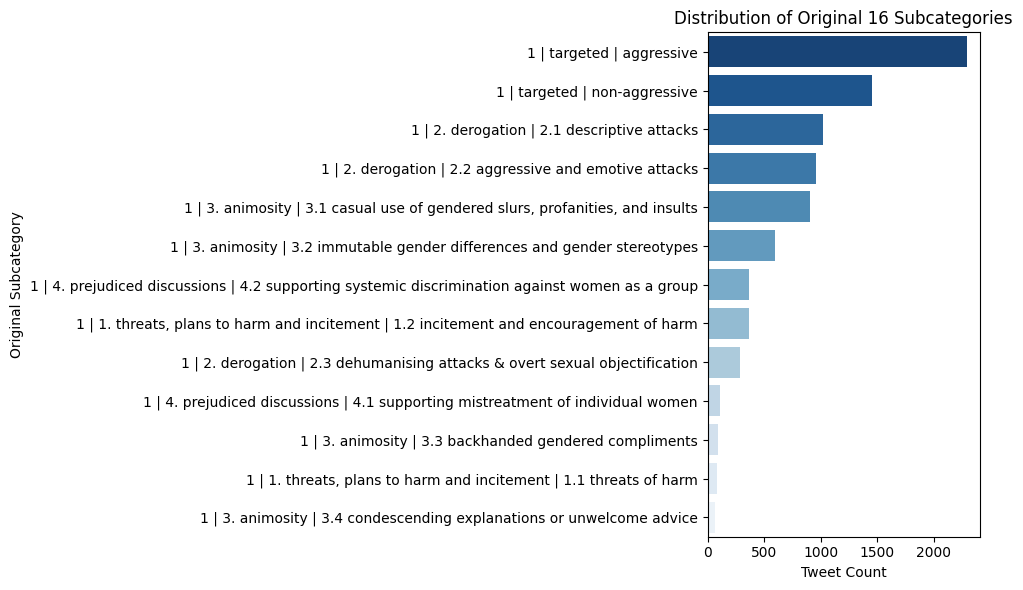

In [6]:


# Bar chart for original subcategories
plt.figure(figsize=(10, 6))
sns.barplot(
    y=train_df['subcategory_combined'].value_counts().index,
    x=train_df['subcategory_combined'].value_counts().values,
    palette='Blues_r'
)
plt.title('Distribution of Original 16 Subcategories')
plt.xlabel('Tweet Count')
plt.ylabel('Original Subcategory')
plt.tight_layout()
plt.show()

How word count and text length influence sexist or non sexist for task 1


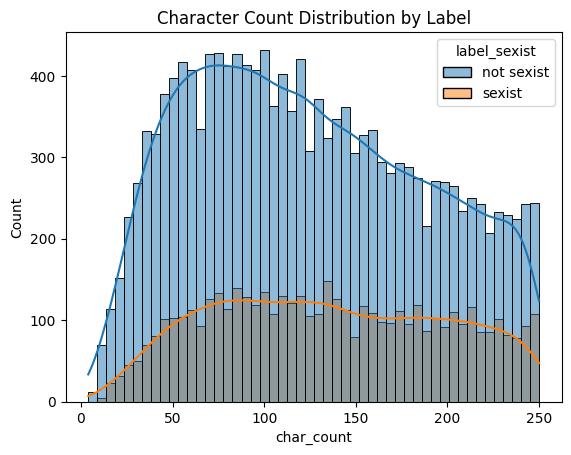

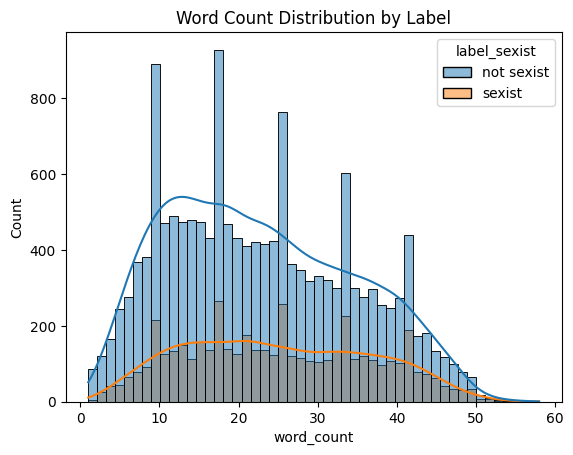

In [4]:
# Add text length and word count
train_df['char_count'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

# Compare distributions
sns.histplot(data=train_df, x='char_count', hue='label_sexist', bins=50, kde=True)
plt.title('Character Count Distribution by Label')
plt.show()

sns.histplot(data=train_df, x='word_count', hue='label_sexist', bins=50, kde=True)
plt.title('Word Count Distribution by Label')
plt.show()


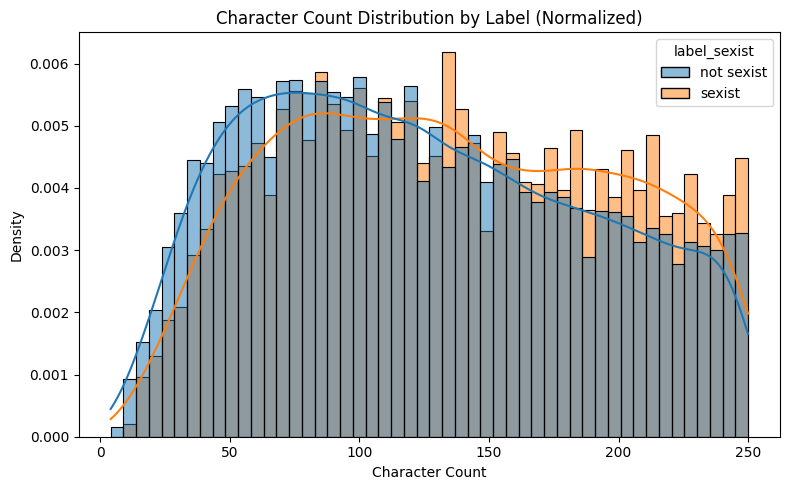

In [18]:
train_df['char_count'] = train_df['text'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(
    data=train_df,
    x='char_count',
    hue='label_sexist',
    bins=50,
    kde=True,
    stat='density',         # Normalize to percentage-like curves
    common_norm=False,      # Separate normalization per label
)
plt.title('Character Count Distribution by Label (Normalized)')
plt.xlabel('Character Count')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [10]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 12.0 MB/s eta 0:00:00


In [12]:
import emoji
import re

# Function to extract emojis
def extract_emojis(text):
    return [char for char in text if char in emoji.EMOJI_DATA]

# Add emoji-related columns
train_df['emoji_list'] = train_df['text'].apply(extract_emojis)
train_df['emoji_count'] = train_df['emoji_list'].apply(len)
train_df['has_emoji'] = train_df['emoji_count'].apply(lambda x: 1 if x > 0 else 0)

# Group by label_sexist
emoji_stats = train_df.groupby('label_sexist')[['has_emoji', 'emoji_count']].agg(
    total_tweets=('has_emoji', 'count'),
    tweets_with_emojis=('has_emoji', 'sum'),
    avg_emoji_per_tweet=('emoji_count', 'mean'),
    pct_with_emojis=('has_emoji', 'mean')
).reset_index()

# Convert to percentage format
emoji_stats['pct_with_emojis'] = (emoji_stats['pct_with_emojis'] * 100).round(2)

# View result
print(emoji_stats)

  label_sexist  total_tweets  tweets_with_emojis  avg_emoji_per_tweet  \
0   not sexist         15159                 360             0.050333   
1       sexist          4857                  84             0.035001   

   pct_with_emojis  
0             2.37  
1             1.73  


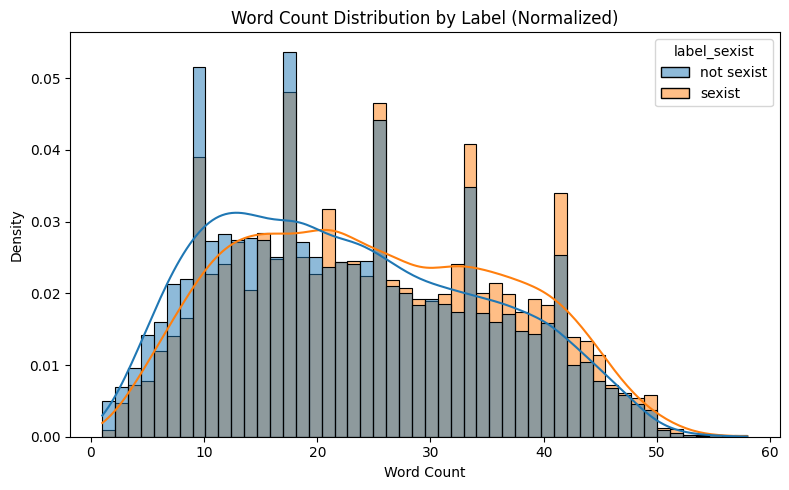

In [19]:
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(
    data=train_df,
    x='word_count',
    hue='label_sexist',
    bins=50,
    kde=True,
    stat='density',
    common_norm=False,
)
plt.title('Word Count Distribution by Label (Normalized)')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/traducido_dataset_unificado_v_30jun.csv')

# Basic text features
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['uppercase_count'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper()))
df['has_question'] = df['text'].apply(lambda x: '?' in x).astype(int)
df['has_exclamation'] = df['text'].apply(lambda x: '!' in x).astype(int)
df['has_url'] = df['text'].str.contains('http').astype(int)

# Map labels to numeric
df['is_sexist'] = df['task1'].map({'sexist': 1, 'non-sexist': 0})


/tmp/ipython-input-12-2423887234.py:1: DtypeWarning: Columns (9,10,11,12,13,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/traducido_dataset_unificado_v_30jun.csv')


Understanding to see if there are other charecteristics that correlate with sexist text


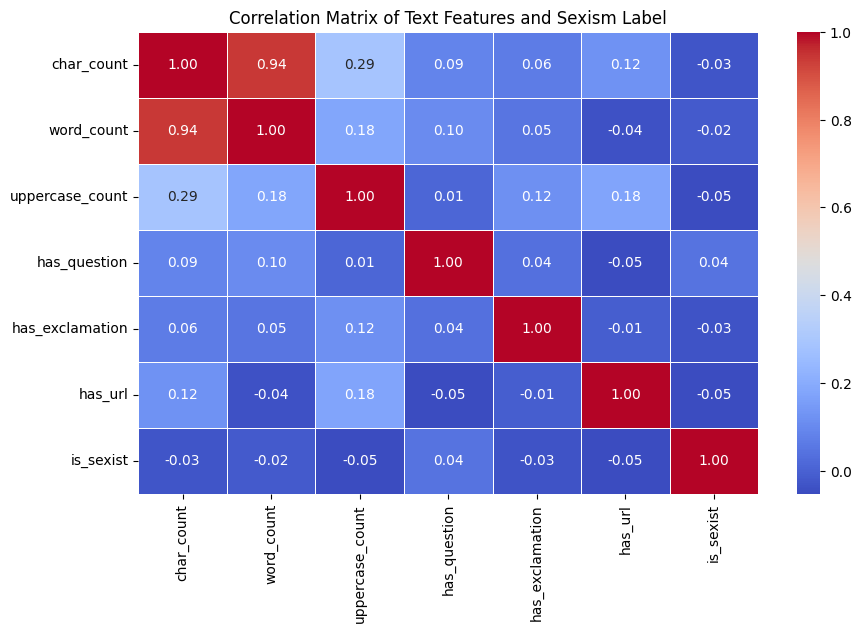

In [ ]:
numeric_cols = ['char_count', 'word_count', 'uppercase_count', 'has_question', 'has_exclamation', 'has_url', 'is_sexist']

# Correlation matrix
corr = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Text Features and Sexism Label")
plt.show()


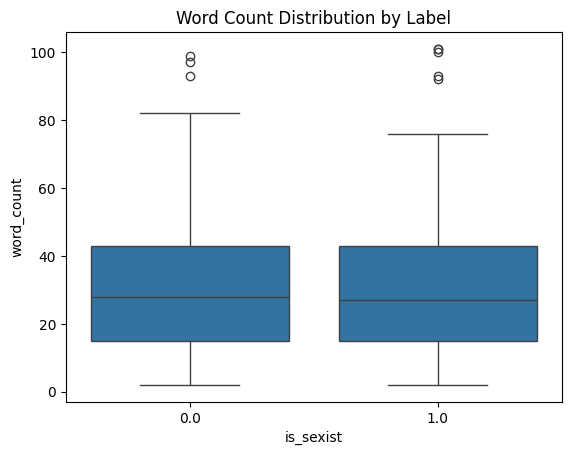

In [ ]:
sns.boxplot(x='is_sexist', y='word_count', data=df)
plt.title("Word Count Distribution by Label")
plt.show()

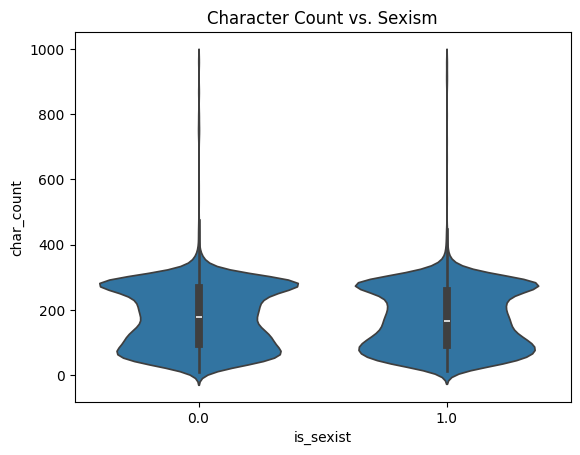

In [ ]:
sns.violinplot(x='is_sexist', y='char_count', data=df)
plt.title("Character Count vs. Sexism")
plt.show()

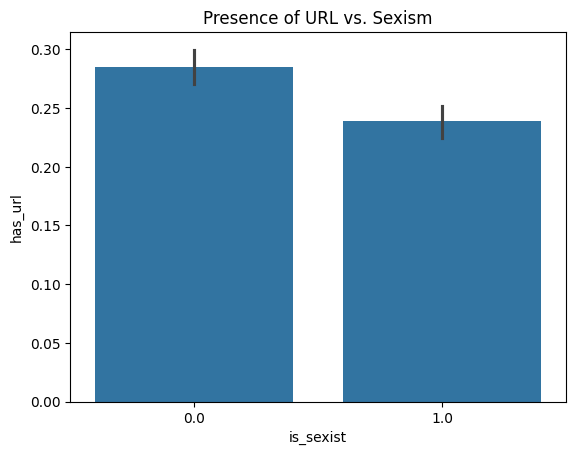

In [ ]:
sns.barplot(x='is_sexist', y='has_url', data=df)
plt.title("Presence of URL vs. Sexism")
plt.show()

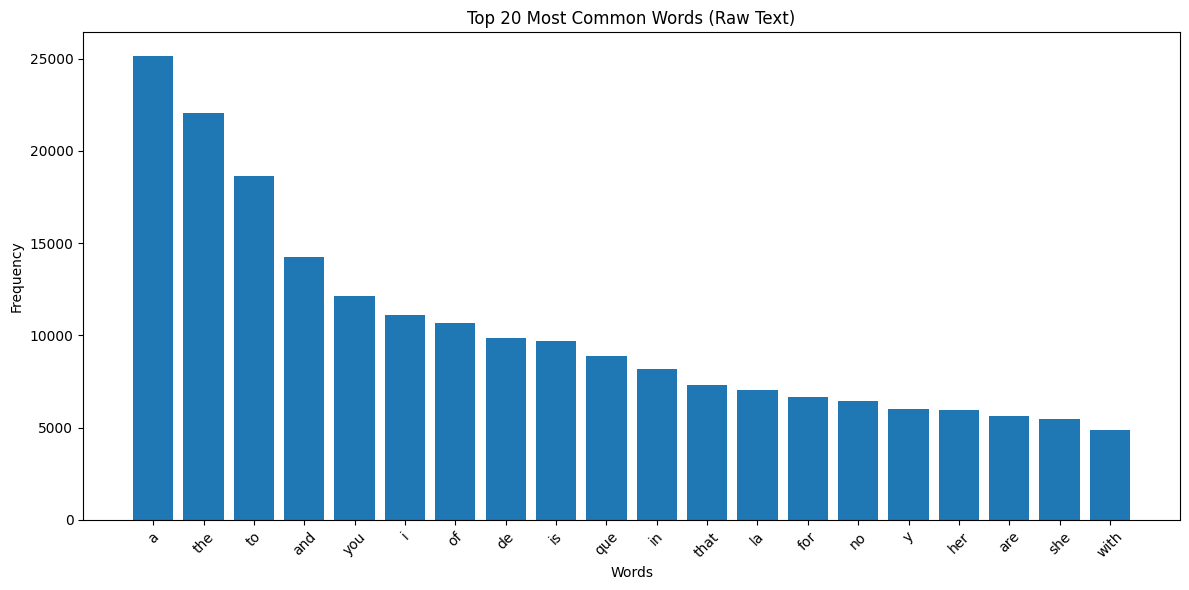

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Combine all text into one big string
all_text = ' '.join(train_df['text'].astype(str)).lower()

# Tokenize (simple split on whitespace)
words = all_text.split()

# Count word frequencies
word_counts = Counter(words)

# Get top N most common words
top_n = 20
common_words = word_counts.most_common(top_n)

# Plotting
words, counts = zip(*common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title(f"Top {top_n} Most Common Words (Raw Text)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


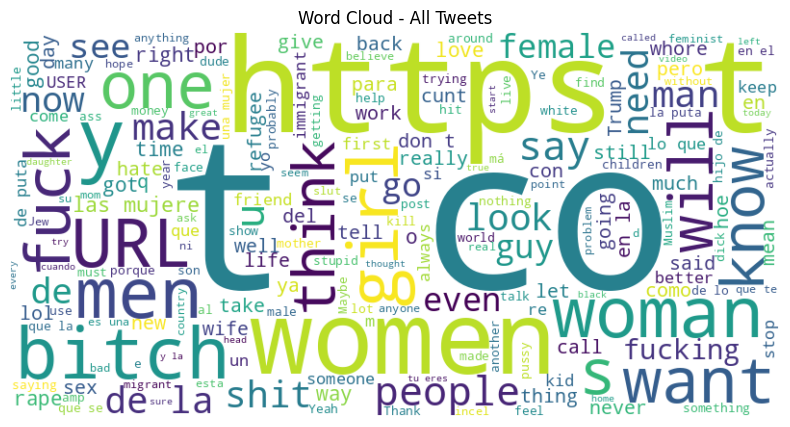

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all text from the column into one string
all_text = ' '.join(train_df['text'].astype(str))

# Create and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - All Tweets")
plt.show()


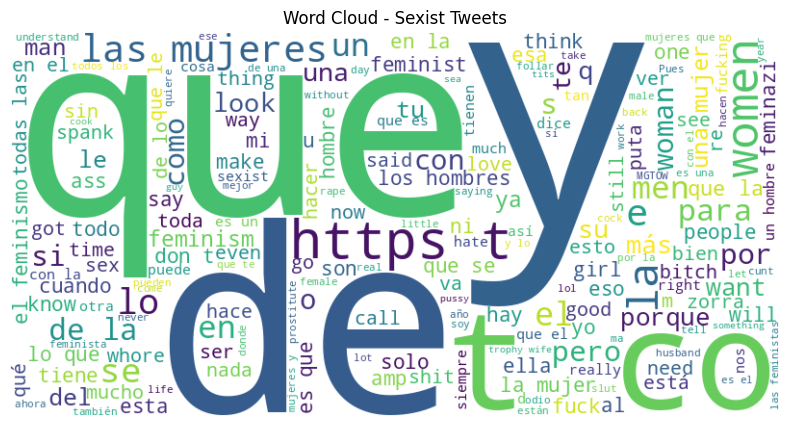

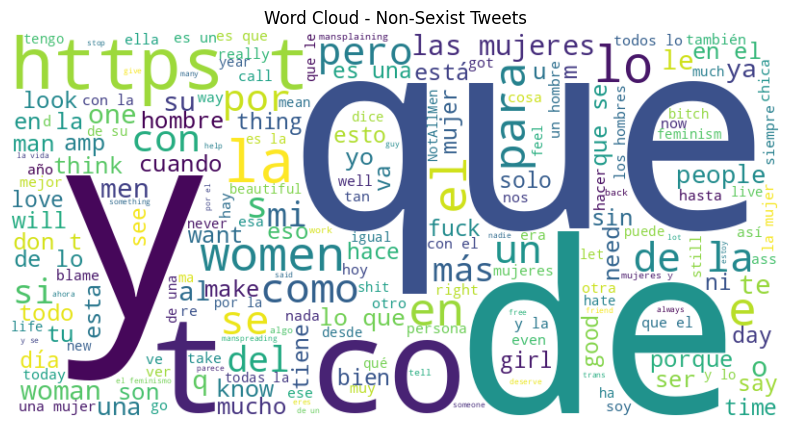

In [11]:
# Word cloud for sexist tweets only
sexist_text = ' '.join(train_df[train_df['task1'] == 'sexist']['text'].astype(str))
wordcloud_sexist = WordCloud(width=800, height=400, background_color='white').generate(sexist_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sexist, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Sexist Tweets")
plt.show()

# Word cloud for non-sexist tweets only
non_sexist_text = ' '.join(train_df[train_df['task1'] == 'non-sexist']['text'].astype(str))
wordcloud_non_sexist = WordCloud(width=800, height=400, background_color='white').generate(non_sexist_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_sexist, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Non-Sexist Tweets")
plt.show()


Here I am trying to remove stopwords and redo the word cloud and the bar graphs with refined library


In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    # Remove mentions, hashtags, punctuation, numbers
    text = re.sub(r"@\w+|#\w+|[^a-zA-Z\s]", '', text)
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = text.split()
    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
train_df['clean_text'] = train_df['text'].apply(preprocess)


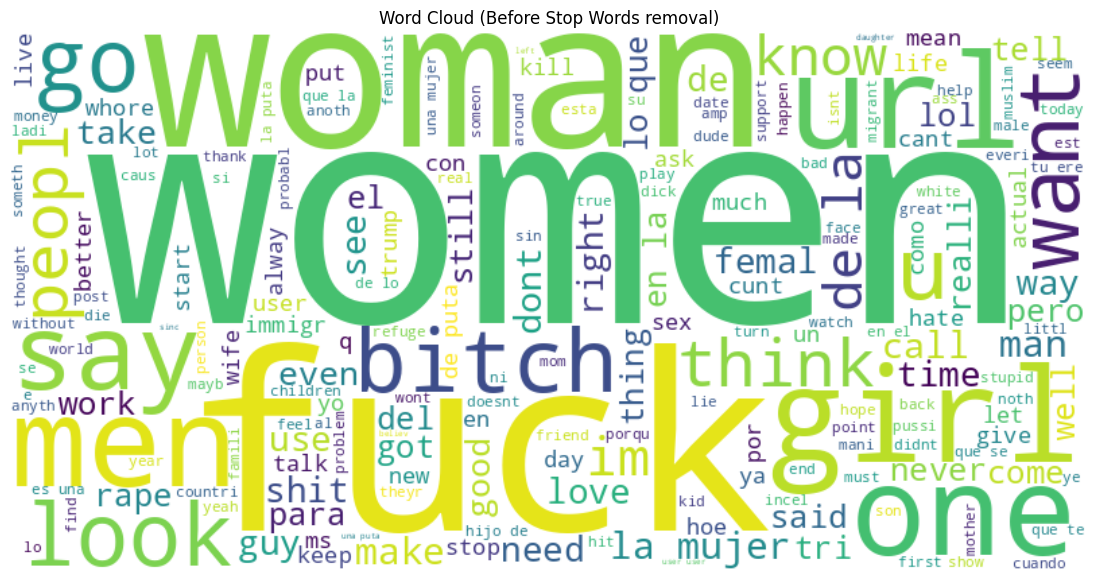

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# For all tweets
all_clean_text = ' '.join(train_df['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_clean_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud (Before Stop Words removal)")
plt.show()


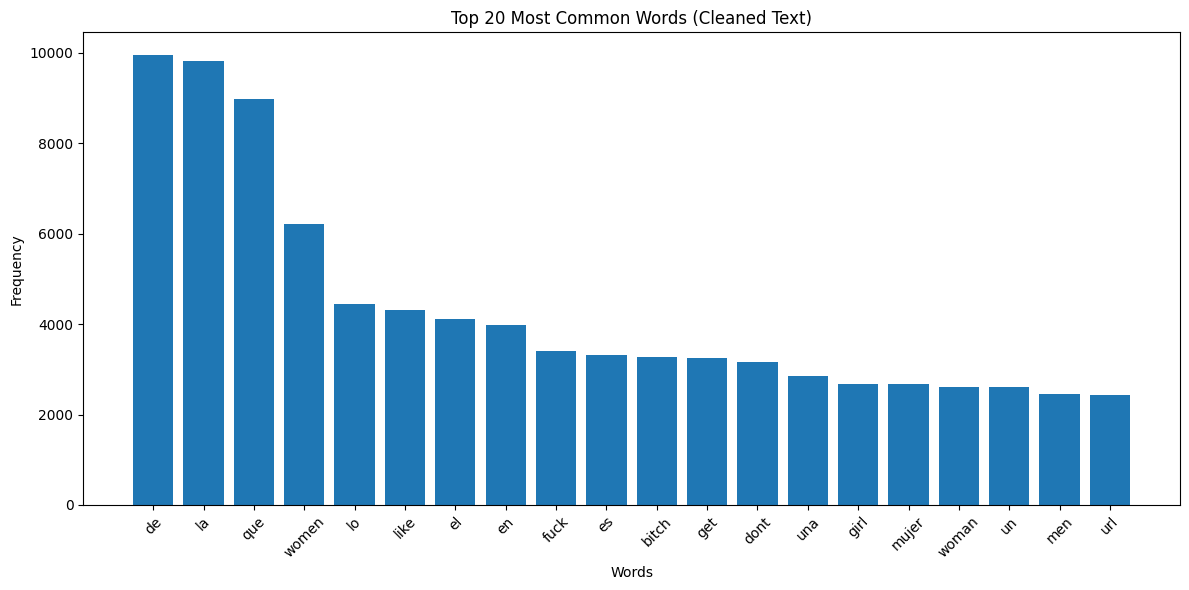

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Combine all cleaned text
all_clean_text = ' '.join(train_df['clean_text'])

# Tokenize the cleaned text
clean_words = all_clean_text.split()

# Count word frequencies
word_counts_clean = Counter(clean_words)

# Get top N most frequent words
top_n = 20
common_clean_words = word_counts_clean.most_common(top_n)

# Plotting
words, counts = zip(*common_clean_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title(f"Top {top_n} Most Common Words (Cleaned Text)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

# Download stopwords
nltk.download('stopwords')

# Load training data
train_df = pd.read_csv('/content/drive/MyDrive/traducido_dataset_unificado_v_30jun.csv')

# Preprocessing setup
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    # Remove mentions, hashtags, punctuation, numbers
    text = re.sub(r"@\w+|#\w+|[^a-zA-Z\s]", '', text)
    # Lowercase
    text = text.lower()
    # Tokenize, remove stopwords, apply stemming
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
train_df['clean_text'] = train_df['text'].apply(preprocess)

# Combine all cleaned text
all_clean_text = ' '.join(train_df['clean_text'])
tokens = all_clean_text.split()

# Count word frequencies
word_counts = Counter(tokens)

# Create a DataFrame
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
word_freq_df = word_freq_df.sort_values(by='count', ascending=False).reset_index(drop=True)

# Display top rows
print(word_freq_df.head(20))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-22-2354752968.py:12: DtypeWarning: Columns (9,10,11,12,13,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/drive/MyDrive/traducido_dataset_unificado_v_30jun.csv')


     word  count
0      de   9957
1      la   9820
2     que   8975
3   women   6224
4      lo   4440
5    like   4302
6      el   4113
7      en   3986
8    fuck   3412
9      es   3312
10  bitch   3272
11    get   3240
12   dont   3173
13    una   2857
14  mujer   2668
15   girl   2668
16  woman   2614
17     un   2612
18    men   2445
19    url   2431


In [ ]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 28.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp_es = spacy.load("es_core_news_sm")

# Example: remove Spanish stopwords
def remove_spacy_stopwords(text):
    doc = nlp_es(text)
    return ' '.join([token.text for token in doc if not token.is_stop])


In [ ]:
stop_words = set(stopwords.words('english')) | set(stopwords.words('spanish'))

def preprocess(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+|#\w+|[^a-zA-Z\s]", '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


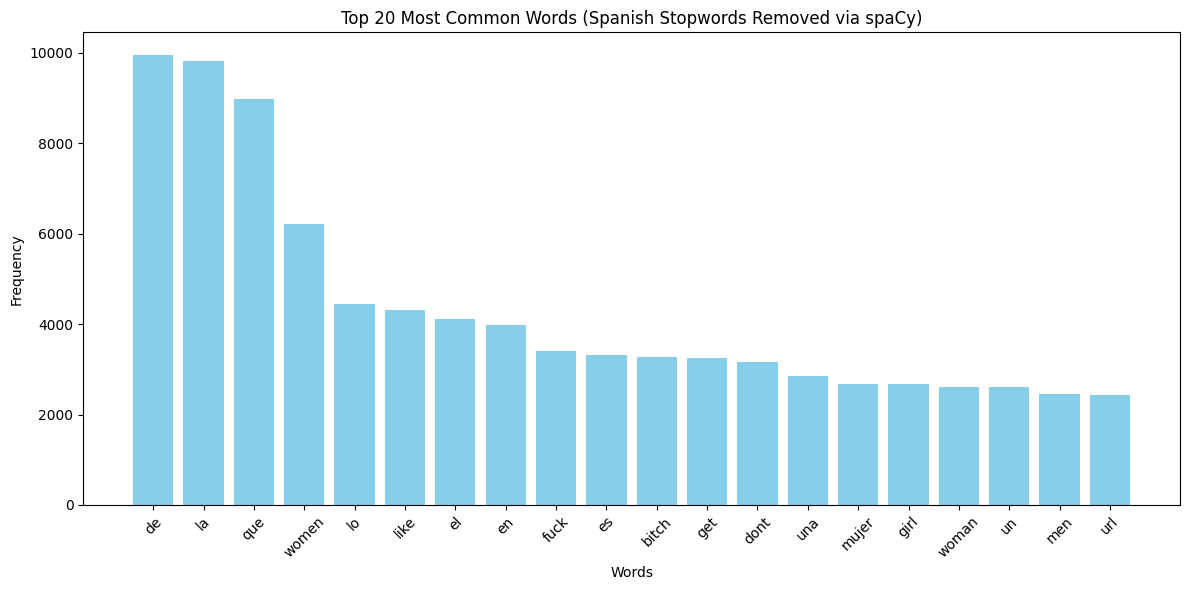

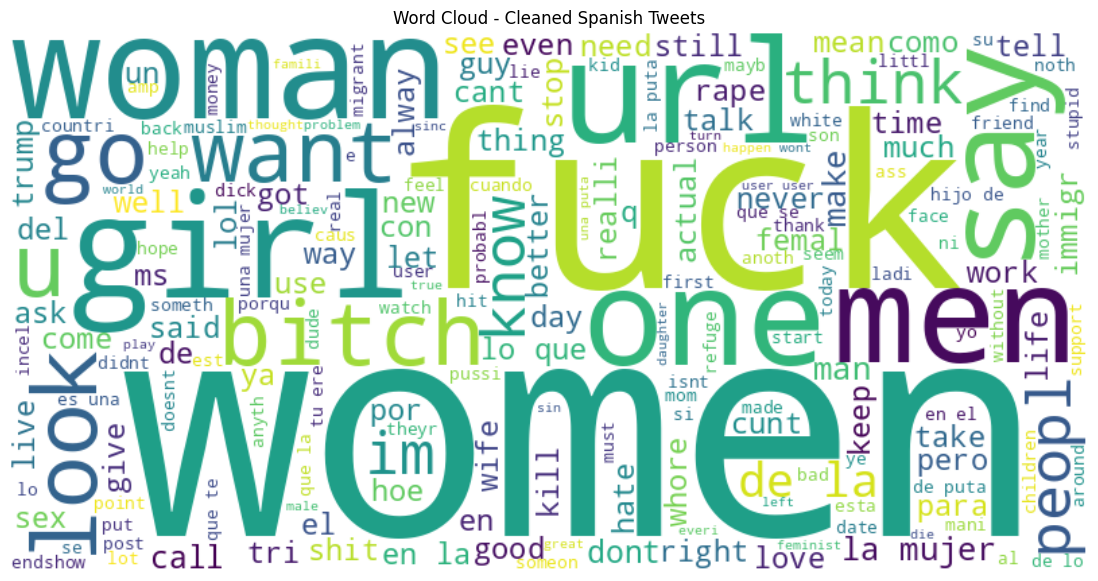

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all cleaned text
all_clean_text = ' '.join(train_df['clean_text'])
tokens = all_clean_text.split()

# Count word frequencies
word_counts = Counter(tokens)
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
word_freq_df = word_freq_df.sort_values(by='count', ascending=False).reset_index(drop=True)

# Bar Chart of Top N Words
top_n = 20
top_words = word_freq_df.head(top_n)
plt.figure(figsize=(12, 6))
plt.bar(top_words['word'], top_words['count'], color='skyblue')
plt.xticks(rotation=45)
plt.title(f"Top {top_n} Most Common Words (Spanish Stopwords Removed via spaCy)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_clean_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Cleaned Spanish Tweets")
plt.show()


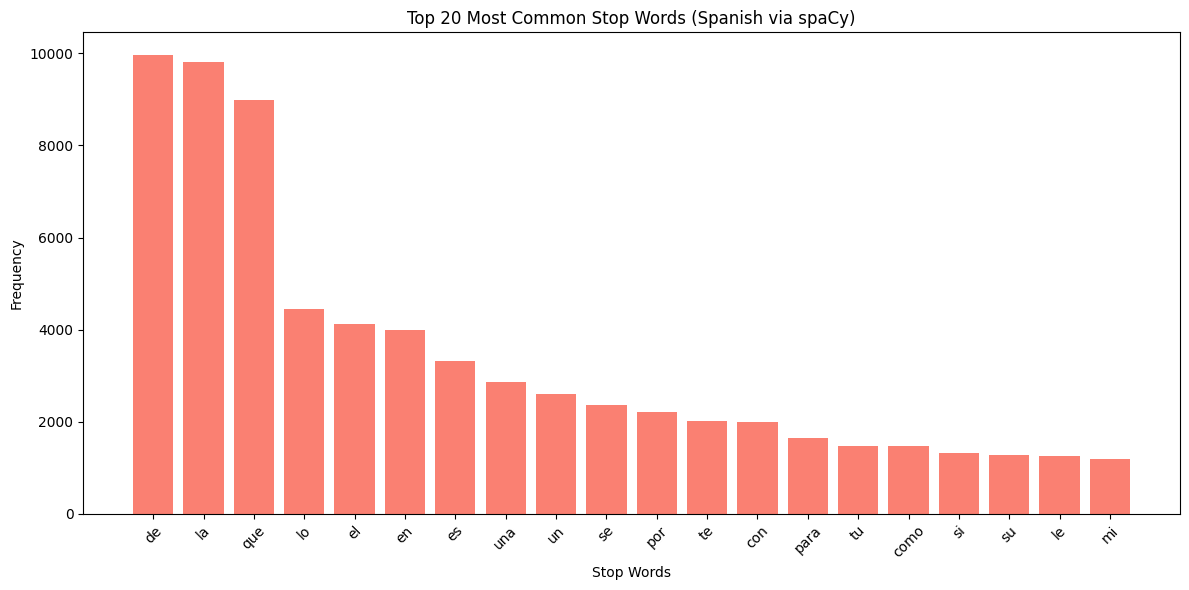

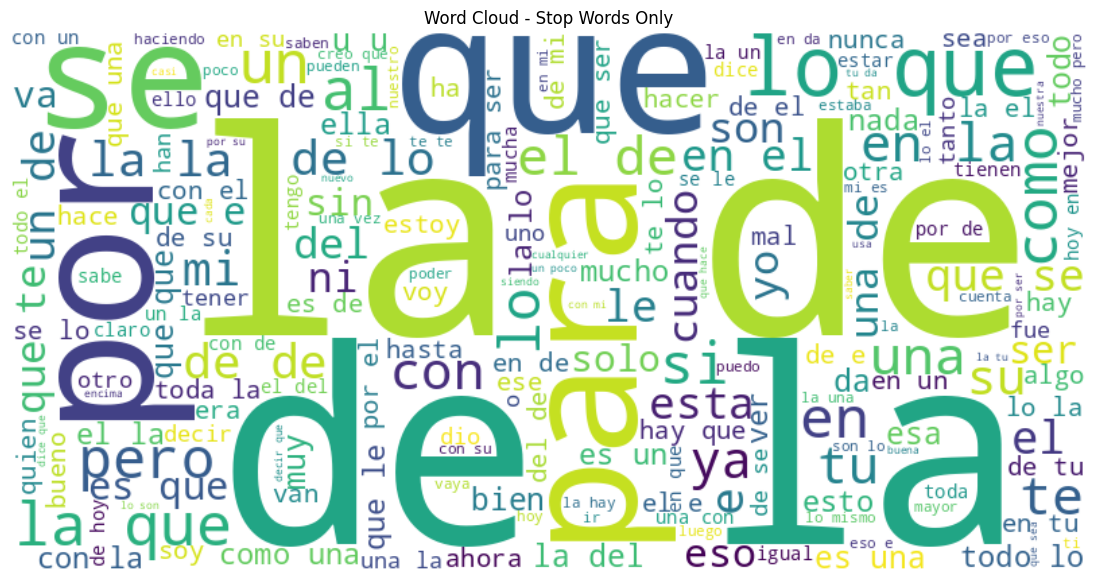

In [ ]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load Spanish stopwords from spaCy
nlp = spacy.blank("es")
stopwords = nlp.Defaults.stop_words

# Combine all cleaned text
all_clean_text = ' '.join(train_df['clean_text'])
tokens = all_clean_text.split()

# Keep only tokens that ARE in the stopword list
stopword_tokens = [word for word in tokens if word.lower() in stopwords]

# Count stopword frequencies
stopword_counts = Counter(stopword_tokens)
stopword_freq_df = pd.DataFrame(stopword_counts.items(), columns=['word', 'count'])
stopword_freq_df = stopword_freq_df.sort_values(by='count', ascending=False).reset_index(drop=True)

# Bar Chart of Top N Stopwords
top_n = 20
top_stopwords = stopword_freq_df.head(top_n)
plt.figure(figsize=(12, 6))
plt.bar(top_stopwords['word'], top_stopwords['count'], color='salmon')
plt.xticks(rotation=45)
plt.title(f"Top {top_n} Most Common Stop Words (Spanish via spaCy)")
plt.xlabel("Stop Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Word Cloud of Only Stopwords
stopword_text = ' '.join(stopword_tokens)
stopword_cloud = WordCloud(width=800, height=400, background_color='white').generate(stopword_text)

plt.figure(figsize=(15, 7))
plt.imshow(stopword_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Stop Words Only")
plt.show()

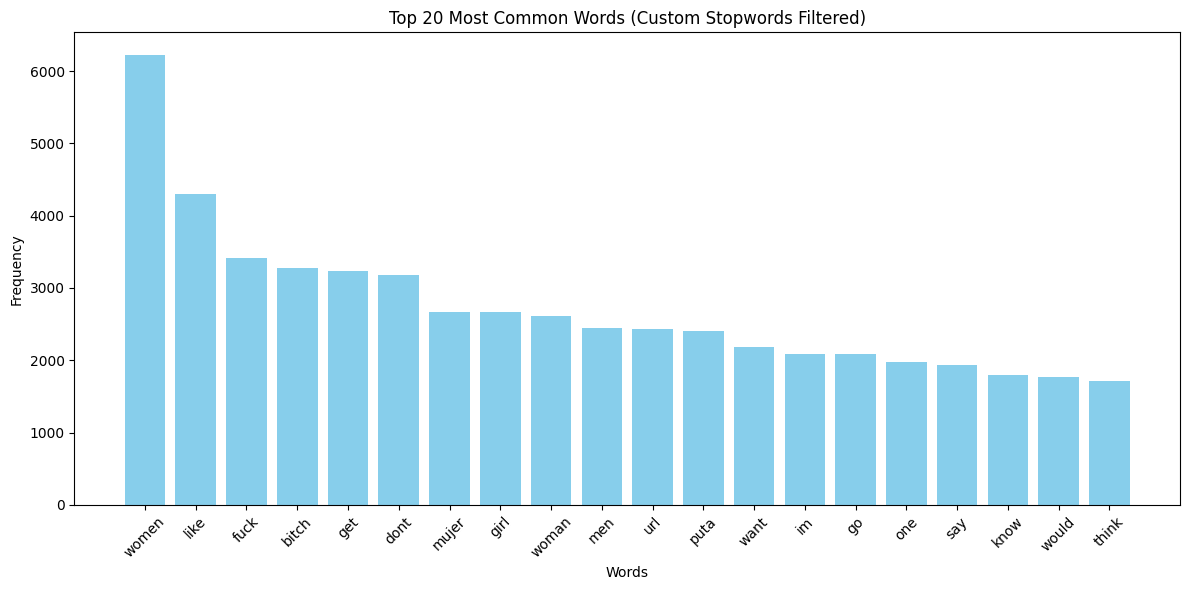

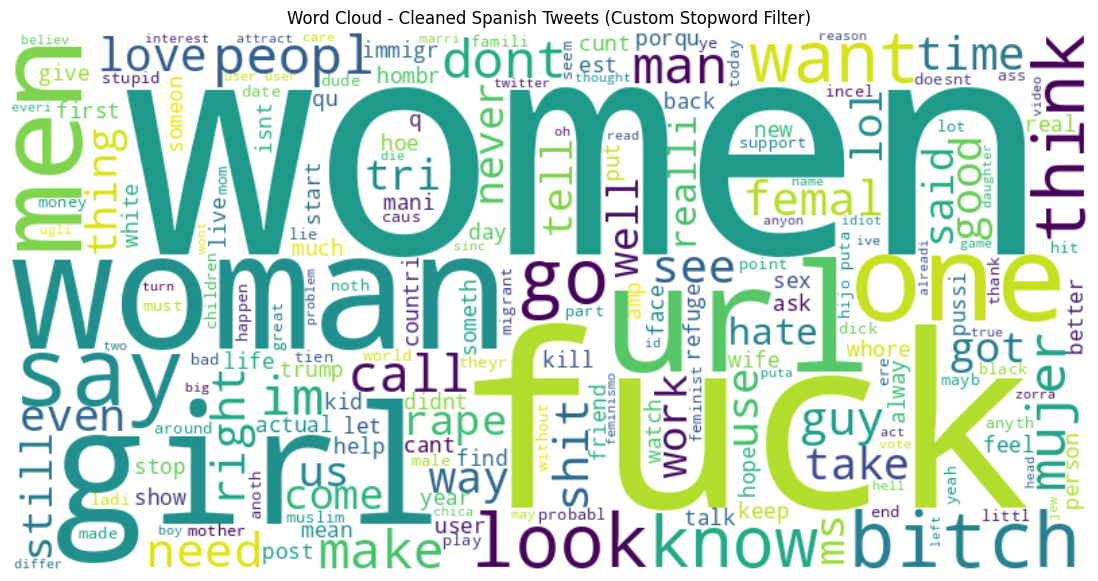

In [ ]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load Spanish stopwords from spaCy
nlp = spacy.blank("es")
stopwords = nlp.Defaults.stop_words

# Define whitelist of task-relevant words to keep (case sensitive)
whitelist = {'mujer', 'mujeres', 'hombre', 'hombres', 'woman', 'women', 'man', 'men', 'girl', 'bitch', 'puta'}

# Combine all cleaned text
all_clean_text = ' '.join(train_df['clean_text'])
tokens = all_clean_text.split()

# Remove stopwords except for whitelist
filtered_tokens = [word for word in tokens if word.lower() not in stopwords or word.lower() in whitelist]

# Count word frequencies
word_counts = Counter(filtered_tokens)
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
word_freq_df = word_freq_df.sort_values(by='count', ascending=False).reset_index(drop=True)

# Bar Chart of Top N Words
top_n = 20
top_words = word_freq_df.head(top_n)
plt.figure(figsize=(12, 6))
plt.bar(top_words['word'], top_words['count'], color='skyblue')
plt.xticks(rotation=45)
plt.title(f"Top {top_n} Most Common Words (Custom Stopwords Filtered)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Word Cloud
wordcloud_text = ' '.join(filtered_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Cleaned Spanish Tweets (Custom Stopword Filter)")
plt.show()

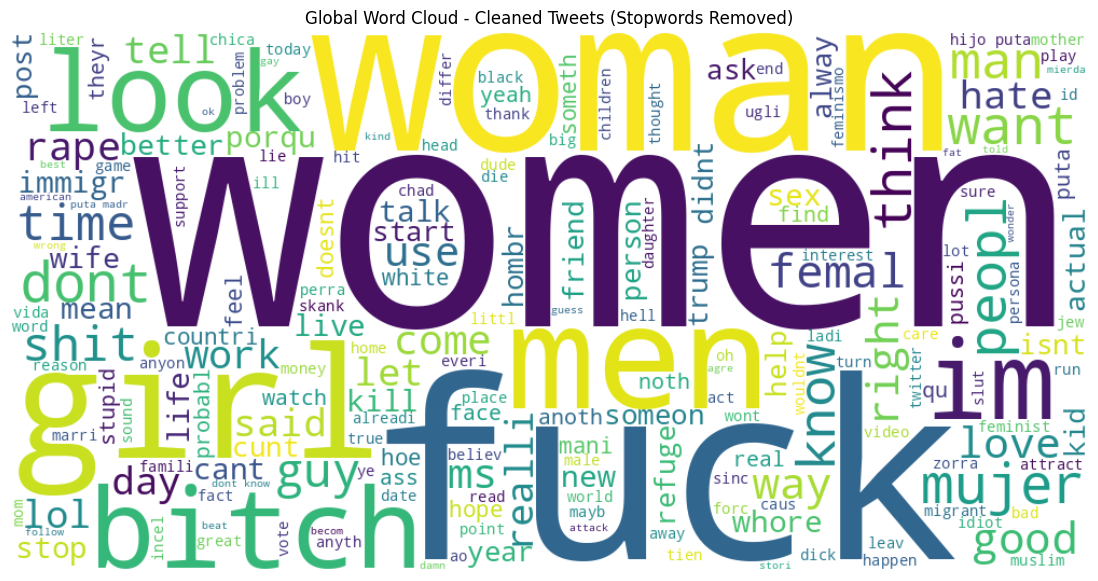

In [ ]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load Spanish stopwords
nlp = spacy.blank("es")
stopwords = nlp.Defaults.stop_words

# Optional: add English stopwords too
from spacy.lang.en.stop_words import STOP_WORDS as en_stopwords
stopwords = stopwords.union(en_stopwords)

# Define your custom blacklist (words that clutter your word cloud)
custom_blacklist = {
    'https', 'rt', 'tco', 'co', 'amp', 'si', 'no', 'https', 'la', 'el',
    'ja', 'jaja', 'jajaja', 'jaj', 'jeje', 'xd', 'xddd', 'xdxd', 'q', 'va', 'x','need','thing','ive','user','ere','got','url','tri','est'
}

# Combine all text
all_text = ' '.join(train_df['clean_text'])
tokens = all_text.split()

# Remove both stopwords and blacklist
filtered_tokens = [
    word for word in tokens
    if word.lower() not in stopwords and word.lower() not in custom_blacklist
]

# Generate word cloud
filtered_text = ' '.join(filtered_tokens)
wc = WordCloud(width=1000, height=500, background_color='white').generate(filtered_text)

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Global Word Cloud - Cleaned Tweets (Stopwords Removed)")
plt.show()

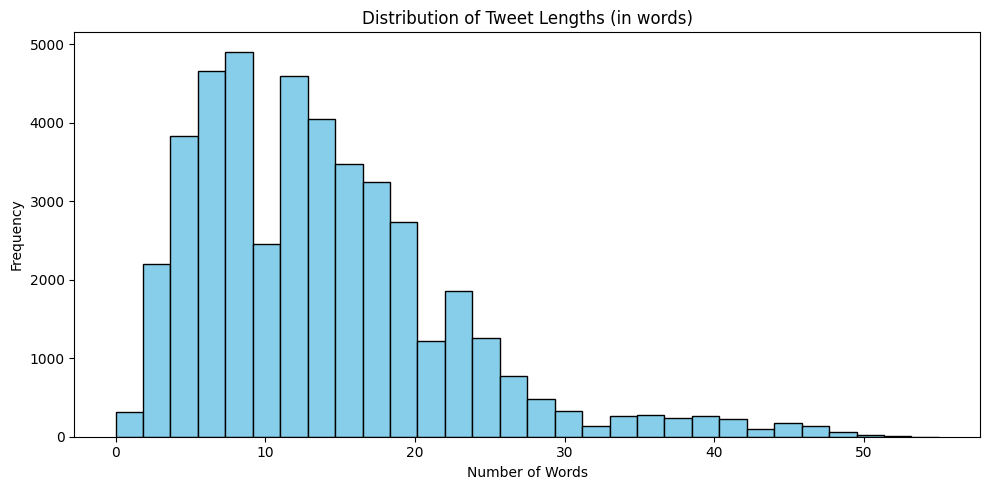

In [ ]:
import matplotlib.pyplot as plt

# Histogram of tweet length in words
tweet_lengths = train_df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
plt.hist(tweet_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Tweet Lengths (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

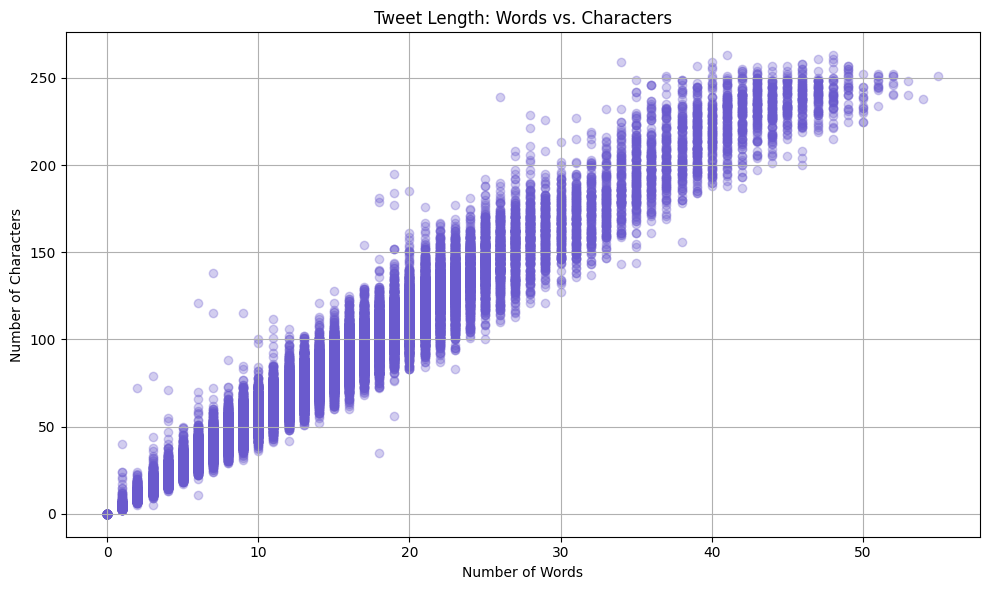

In [ ]:
import matplotlib.pyplot as plt

# Compute tweet lengths
train_df['char_count'] = train_df['clean_text'].apply(len)
train_df['word_count'] = train_df['clean_text'].apply(lambda x: len(x.split()))

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train_df['word_count'], train_df['char_count'], alpha=0.3, color='slateblue')
plt.title('Tweet Length: Words vs. Characters')
plt.xlabel('Number of Words')
plt.ylabel('Number of Characters')
plt.grid(True)
plt.tight_layout()
plt.show()